## Problem statement

To build a machine learning model to predict whether a person is diabetic or not

## Learning Objective:
- Logistic Regression
- Naive Bayes Classifier
- KNN Classifier
- Decision tree classifier
- Random Forest classifier
- Adaboost classifier and Gradientboost classfier
- Stacking Classifier

## Dataset Information

### Source: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.


This dataset consists of nine columns
- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)
- Outcome: Class variable (0 or 1)

### 1. Import required Libraries

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier

### 2. Load the dataset

In [ ]:
# df = pd.read_csv('diabetes_data.csv')
# df.head()

In [ ]:
## If using google colab

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/My Drive/Datasets/diabetes_data.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### 3. Explore the data

In [ ]:
## Lets check basic information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


- There are 768 instances and 9 columns.
- We can observe that there are no missing values present in the dataset.
- The columns 'BMI' and 'DiabetesPedigreeFunction' are having float datatype rest all columns are identified as integer datatype.

In [ ]:
## Lets check the statistical summary of the data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


- We can observe that the average bloodpressure is around 69 (mm Hg).
- The Age of a person ranges from 21 to 81.

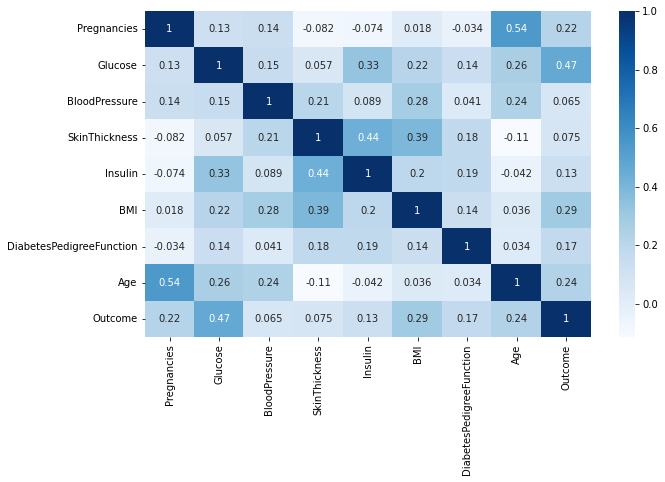

In [ ]:
## lets visualize the correlation using heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.show()

- We can observe that the variables 'Age' and 'Pregnancies' are having a strong positive relationship.
- The variable Glucose is having a positive correlation with the depenedent variable 'outcome'.

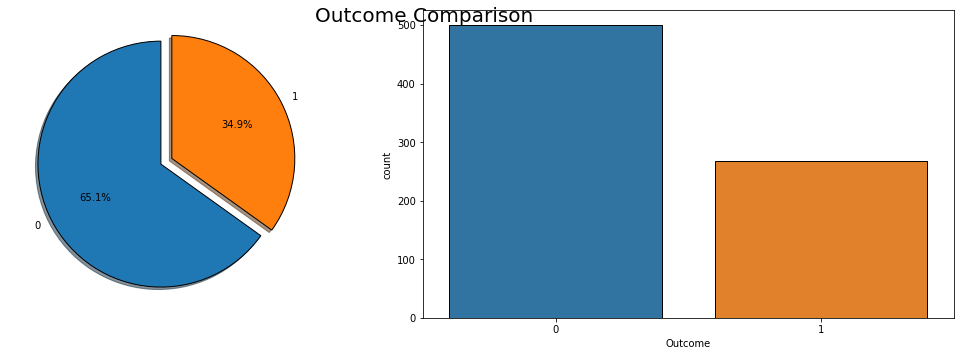

In [ ]:
# Let's check whether the outcome is balanced or not
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(15,5))
fig.suptitle('Outcome Comparison\n', fontsize=20)

ax1.pie(df.Outcome.value_counts().values, labels=df.Outcome.value_counts().index, startangle=90, explode=(0.0, 0.1), shadow=True, autopct='%1.1f%%', wedgeprops={'edgecolor':'black'})
sns.countplot(ax=ax2, data=df, x='Outcome', edgecolor='black')

plt.tight_layout()

### 4. Predict "Outcome" using Logistic regression

In [ ]:
## separate independent and target variable
X = df.drop('Outcome',axis=1)
Y = df['Outcome']

## Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.30)
print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

(537, 8) (231, 8)
(537,) (231,)


In [ ]:
## Scaling the data using standard scalar
ss = StandardScaler()

X_train_sc = ss.fit_transform(X_train.iloc[:,:])
X_test_sc = ss.transform(X_test.iloc[:,:])

In [ ]:
## Fit logistic regression model for the unscaled train dataset
log_reg = LogisticRegression()
log_reg.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
## Fit logistic regression model for the scaled train dataset
log_reg1 = LogisticRegression()
log_reg1.fit(X_train_sc,Y_train)

LogisticRegression()

In [ ]:
## compute y predicted labels for both scaled and unscaled data
y_pred_train = log_reg.predict(X_train)
y_pred_test = log_reg.predict(X_test)

y_pred_train_sc = log_reg1.predict(X_train_sc)
y_pred_test_sc = log_reg1.predict(X_test_sc)

In [ ]:
## accuracy for unscaled data
print('accuracy train:',accuracy_score(Y_train,y_pred_train))
print('accuracy test:',accuracy_score(Y_test,y_pred_test))

accuracy train: 0.7988826815642458
accuracy test: 0.7445887445887446


In [ ]:
## accuracy for scaled data
print('accuracy train:',accuracy_score(Y_train,y_pred_train_sc))
print('accuracy test:',accuracy_score(Y_test,y_pred_test_sc))

accuracy train: 0.7877094972067039
accuracy test: 0.7316017316017316


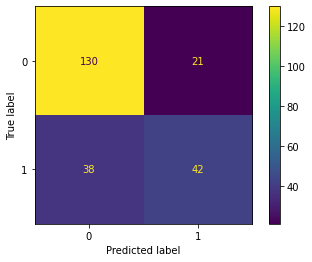

In [ ]:
## Confusion matrix using test data
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(log_reg, X_test, Y_test)  
plt.show()

In [ ]:
## Compute precision, recall and F1-score
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.77      0.86      0.82       151
           1       0.67      0.53      0.59        80

    accuracy                           0.74       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.74      0.74      0.74       231



### 5. Predict "Outcome" using Naive Bayes Classfier model

In [ ]:
## Fit naive bayes classifier for the train dataset
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train_sc,Y_train)

GaussianNB()

In [ ]:
## compute the y predicted lables
nb_y_pred_train = gnb.predict(X_train_sc)
nb_y_pred_test = gnb.predict(X_test_sc)

In [ ]:
## accuracy 
print('accuracy train:',accuracy_score(Y_train,nb_y_pred_train))
print('accuracy test:',accuracy_score(Y_test,nb_y_pred_test))

accuracy train: 0.7839851024208566
accuracy test: 0.7186147186147186


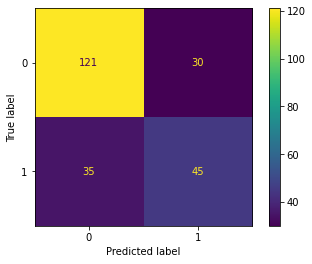

In [ ]:
## Confusion matrix using test data
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(gnb, X_test_sc, Y_test)  
plt.show()

In [ ]:
## Compute precision, recall and F1-score
from sklearn.metrics import classification_report
print(classification_report(Y_test,nb_y_pred_test))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79       151
           1       0.60      0.56      0.58        80

    accuracy                           0.72       231
   macro avg       0.69      0.68      0.68       231
weighted avg       0.71      0.72      0.72       231



###  6. Predict "Outcome" using KNN Classifier model

In [ ]:
## Fit the KNN classifier model to the train dataset
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_sc,Y_train)

KNeighborsClassifier()

In [ ]:
## compute y predicted labels
y_pred_train_knn = knn.predict(X_train_sc)
y_pred_test_knn = knn.predict(X_test_sc)

In [ ]:
## accuracy 
print('accuracy train:',accuracy_score(Y_train,y_pred_train_knn))
print('accuracy test:',accuracy_score(Y_test,y_pred_test_knn))

accuracy train: 0.8230912476722533
accuracy test: 0.6926406926406926


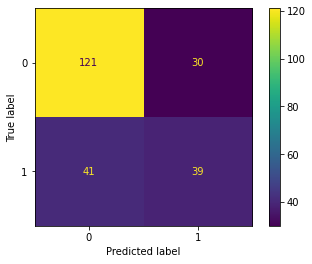

In [ ]:
## Confusion matrix using test data
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, X_test_sc, Y_test)  
plt.show()

In [ ]:
## Compute precision, recall and F1-score
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred_test_knn))

              precision    recall  f1-score   support

           0       0.75      0.80      0.77       151
           1       0.57      0.49      0.52        80

    accuracy                           0.69       231
   macro avg       0.66      0.64      0.65       231
weighted avg       0.68      0.69      0.69       231



#### Choosing Optimal K Value
- In KNN Choice of k is very critical. A small value of k means that noise will have a higher influence on the result. A large value makes it computationally expensive and is contradictory to the basic idea behind KNN, that close points might have similar densities or classes.The default parameter for the number of neighbors k is 5.

In [ ]:
error_rate = []

for i in range(1,15):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_sc,Y_train)
    pred_i = knn.predict(X_test_sc)
    error_rate.append(np.mean(pred_i != Y_test))

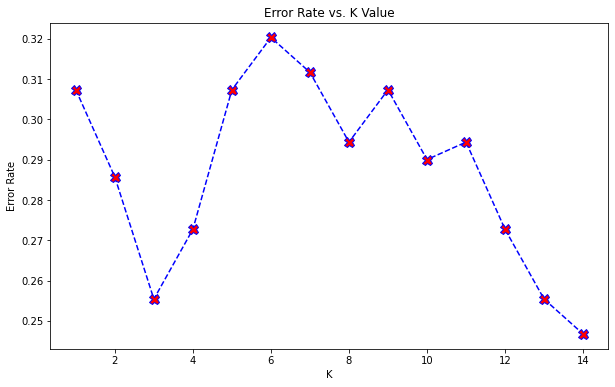

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,15),error_rate,color='blue', linestyle='dashed', marker='X',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

- From the above plot, we can observe that the error is very low at 3 and 14 neigbours
- lets build KNN classifier using this K value and compare the accuracy

In [ ]:
## Model 2: KNN classfier with optimal K=3
knn_two = KNeighborsClassifier(n_neighbors=3)
knn_two.fit(X_train_sc,Y_train)

## y predicted
y_pred_train_knn_two = knn_two.predict(X_train_sc)
y_pred_test_knn_two = knn_two.predict(X_test_sc)

In [ ]:
### Comparison of the two KNN classification models
print('accuracy (default K):',accuracy_score(Y_train,y_pred_train_knn_two))
print('accuracy (k=3)      :',accuracy_score(Y_test,y_pred_test_knn_two))

accuracy (default K): 0.8640595903165735
accuracy (k=3)      : 0.7445887445887446


In [ ]:
## Compute precision, recall and F1-score
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred_test_knn_two))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81       151
           1       0.66      0.54      0.59        80

    accuracy                           0.74       231
   macro avg       0.72      0.70      0.70       231
weighted avg       0.74      0.74      0.74       231



### 7. Predict "Outcome" using Decision tree classifier model

In [ ]:
## Fit the Decision tree classifier model to the train dataset
dt = DecisionTreeClassifier()
dt.fit(X_train_sc,Y_train)

## compute y predicted labels
y_test_pred_dt = dt.predict(X_test_sc)
y_train_pred_dt = dt.predict(X_train_sc)

In [ ]:
## accuracy
print('accuracy train:',accuracy_score(Y_train,y_train_pred_dt))
print('accuracy test:',accuracy_score(Y_test,y_test_pred_dt))

accuracy train: 1.0
accuracy test: 0.6320346320346321


- We can see the model is over-fitted. Lets try to prune it.

#### Train multiple Decision tree models with different values for max_depth and max_features

In [ ]:
max_depth = [3,5,7]
max_features = [3,5,7]
for i in max_depth:
  for j in max_features:
    dt = DecisionTreeClassifier(max_depth = i, max_features=j)
    dt.fit(X_train_sc,Y_train)
    y_test_pred_dt = dt.predict(X_test_sc)
    y_train_pred_dt = dt.predict(X_train_sc)
    print(f"Train accuracy with max_depth = {i}, max_feature = {j}",accuracy_score(Y_train,y_train_pred_dt))
    print(f"Test accuracy with max_depth = {i}, max_feature = {j}",accuracy_score(Y_test,y_test_pred_dt))
    print("-"*20)

Train accuracy with max_depth = 3, max_feature = 3 0.7877094972067039
Test accuracy with max_depth = 3, max_feature = 3 0.7402597402597403
--------------------
Train accuracy with max_depth = 3, max_feature = 5 0.8044692737430168
Test accuracy with max_depth = 3, max_feature = 5 0.7142857142857143
--------------------
Train accuracy with max_depth = 3, max_feature = 7 0.7877094972067039
Test accuracy with max_depth = 3, max_feature = 7 0.7272727272727273
--------------------
Train accuracy with max_depth = 5, max_feature = 3 0.7970204841713222
Test accuracy with max_depth = 5, max_feature = 3 0.658008658008658
--------------------
Train accuracy with max_depth = 5, max_feature = 5 0.8472998137802608
Test accuracy with max_depth = 5, max_feature = 5 0.683982683982684
--------------------
Train accuracy with max_depth = 5, max_feature = 7 0.845437616387337
Test accuracy with max_depth = 5, max_feature = 7 0.696969696969697
--------------------
Train accuracy with max_depth = 7, max_featu

- We can observe that for max_depth=5, and max_feature=3 the accuracy scores are balanced for both train and test.
- Also, we can try and tune different combinations of the hyperparameters and increase the accuracy of the model.

### 8. Predict "Outcome" using Random Forest classifier model

In [ ]:
## Fit the Random Forest classifier model to the train dataset
rf = RandomForestClassifier()
rf.fit(X_train_sc,Y_train)

## compute y predicted labels
y_test_pred_rf = rf.predict(X_test_sc)
y_train_pred_rf = rf.predict(X_train_sc)

In [ ]:
## accuracy
print('accuracy train:',accuracy_score(Y_train,y_train_pred_rf))
print('accuracy test:',accuracy_score(Y_test,y_test_pred_rf))

accuracy train: 1.0
accuracy test: 0.7359307359307359


- Here also we can see the model is over-fitted.
- Later you can try to fix the random forest model using different sets of hyper-parameters

In [ ]:
## Fit the Random Forest classifier model to the train dataset
rf1 = RandomForestClassifier( n_estimators=300, criterion='gini', max_depth=20, 
                            min_samples_split=4, min_samples_leaf=2, max_samples=None)
rf1.fit(X_train_sc,Y_train)

## compute y predicted labels
y_test_pred_rf1 = rf1.predict(X_test_sc)
y_train_pred_rf1 = rf1.predict(X_train_sc)

In [ ]:
## accuracy
print('accuracy train:',accuracy_score(Y_train,y_train_pred_rf1))
print('accuracy test:',accuracy_score(Y_test,y_test_pred_rf1))

accuracy train: 0.9813780260707635
accuracy test: 0.7489177489177489


- Now we can see after using different sets of hyperparameters the model accuracy for train and test is some what balanced than first random forest model.

In [ ]:
## Compute precision, recall and F1-score
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_test_pred_rf1))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       151
           1       0.66      0.56      0.61        80

    accuracy                           0.75       231
   macro avg       0.72      0.71      0.71       231
weighted avg       0.74      0.75      0.74       231



### 9. Predict "Outcome" using Adaboost Classifier model.

In [ ]:
## Fit the Adaboost classifier model to the train dataset
adb = AdaBoostClassifier()
adb.fit(X_train_sc,Y_train)

## compute y predicted labels
y_test_pred_adb = adb.predict(X_test_sc)
y_train_pred_adb = adb.predict(X_train_sc)

In [ ]:
## accuracy
print('accuracy train:',accuracy_score(Y_train,y_train_pred_adb))
print('accuracy test:',accuracy_score(Y_test,y_test_pred_adb))

accuracy train: 0.8417132216014898
accuracy test: 0.7445887445887446


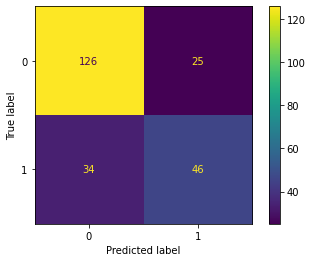

In [ ]:
## Confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(adb, X_test_sc, Y_test)  
plt.show()

In [ ]:
## Compute precision, recall and F1-score
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_test_pred_adb))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       151
           1       0.65      0.57      0.61        80

    accuracy                           0.74       231
   macro avg       0.72      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231



### 10. Predict "Outcome" using GradientBoost Classifier model

In [ ]:
## Fit the GradientBoost classifier model to the train dataset
gb = GradientBoostingClassifier()
gb.fit(X_train_sc,Y_train)

## compute y predicted labels
y_test_pred_gb = gb.predict(X_test_sc)
y_train_pred_gb = gb.predict(X_train_sc)

In [ ]:
## accuracy
print('accuracy train:',accuracy_score(Y_train,y_train_pred_gb))
print('accuracy test:',accuracy_score(Y_test,y_test_pred_gb))

accuracy train: 0.9441340782122905
accuracy test: 0.7316017316017316


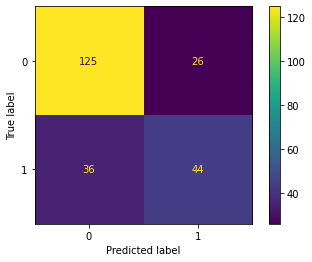

In [ ]:
## Confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(gb, X_test_sc, Y_test)  
plt.show()

In [ ]:
## Compute precision, recall and F1-score
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_test_pred_gb))

              precision    recall  f1-score   support

           0       0.78      0.83      0.80       151
           1       0.63      0.55      0.59        80

    accuracy                           0.73       231
   macro avg       0.70      0.69      0.69       231
weighted avg       0.73      0.73      0.73       231



### 10. Stacking Classifier

In [ ]:
## Fit the Stacking classifier model to the train dataset

models = [('lr',LogisticRegression()),('dt',DecisionTreeClassifier(max_depth=7),AdaBoostClassifier())]
sc = StackingClassifier(estimators = models,final_estimator = RandomForestClassifier(n_estimators=300, criterion='gini', max_depth=20, 
                                                                                    min_samples_split=4, min_samples_leaf=2, max_samples=None))
sc.fit(X_train_sc,Y_train)

## compute y predicted labels
y_test_pred_sc = sc.predict(X_test_sc)
y_train_pred_sc = sc.predict(X_train_sc)

In [ ]:
## accuracy
print('accuracy train:',accuracy_score(Y_train,y_train_pred_sc))
print('accuracy test:',accuracy_score(Y_test,y_test_pred_sc))

accuracy train: 0.7579143389199255
accuracy test: 0.7229437229437229


In [ ]:
## Compute precision, recall and F1-score
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_test_pred_sc))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79       151
           1       0.61      0.55      0.58        80

    accuracy                           0.72       231
   macro avg       0.69      0.68      0.69       231
weighted avg       0.72      0.72      0.72       231



### 11. Comparison table:

In [ ]:
# Comparison table

Comparison1 = pd.DataFrame({'Method':['Logistic Regression'], 
                            'Train accuracy': accuracy_score(Y_train,y_pred_train), 
                           'Test accuracy': accuracy_score(Y_test,y_pred_test)})
Comparison1 = Comparison1[['Method', 'Train accuracy', 'Test accuracy']]


Comparison2 = pd.DataFrame({'Method':['Naive Bayes Classifier'], 
                            'Train accuracy': accuracy_score(Y_train,nb_y_pred_train), 
                           'Test accuracy': accuracy_score(Y_test,nb_y_pred_test)},)
Comparison2 = Comparison2[['Method', 'Train accuracy', 'Test accuracy']]


Comparison3 = pd.DataFrame({'Method':['KNN'], 
                            'Train accuracy': accuracy_score(Y_train,y_pred_train_knn_two), 
                           'Test accuracy': accuracy_score(Y_test,y_pred_test_knn_two)})
Comparison3 = Comparison3[['Method', 'Train accuracy', 'Test accuracy']]


Comparison4 = pd.DataFrame({'Method':['Decision Tree Classifier'], 
                            'Train accuracy': accuracy_score(Y_train,y_train_pred_dt), 
                           'Test accuracy': accuracy_score(Y_test,y_test_pred_dt)})
Comparison4 = Comparison4[['Method', 'Train accuracy', 'Test accuracy']]


Comparison5 = pd.DataFrame({'Method':['Random Forest Classifier'], 
                            'Train accuracy': accuracy_score(Y_train,y_train_pred_rf1), 
                           'Test accuracy': accuracy_score(Y_test,y_test_pred_rf1)})
Comparison5 = Comparison5[['Method', 'Train accuracy', 'Test accuracy']]


Comparison6 = pd.DataFrame({'Method':['AdaBoost Classifier'], 
                            'Train accuracy': accuracy_score(Y_train,y_train_pred_adb), 
                           'Test accuracy': accuracy_score(Y_test,y_test_pred_adb)})
Comparison6 = Comparison6[['Method', 'Train accuracy', 'Test accuracy']]


Comparison7 = pd.DataFrame({'Method':['GradientBoost Classifier'], 
                            'Train accuracy': accuracy_score(Y_train,y_train_pred_gb), 
                           'Test accuracy': accuracy_score(Y_test,y_test_pred_gb)})
Comparison7 = Comparison7[['Method', 'Train accuracy', 'Test accuracy']]


Comparison8 = pd.DataFrame({'Method':['Stacking Classifier'], 
                            'Train accuracy': accuracy_score(Y_train,y_train_pred_sc), 
                           'Test accuracy': accuracy_score(Y_test,y_test_pred_sc)})
Comparison8 = Comparison8[['Method', 'Train accuracy', 'Test accuracy']]

Comparison = pd.concat([Comparison1, Comparison2,Comparison3,Comparison4,Comparison5,Comparison6,Comparison7,Comparison8])

Comparison

,Method,Train accuracy,Test accuracy
0,Logistic Regression,0.798883,0.744589
0,Naive Bayes Classifier,0.783985,0.718615
0,KNN,0.864060,0.744589
0,Decision Tree Classifier,0.910615,0.670996
0,Random Forest Classifier,0.981378,0.748918
0,AdaBoost Classifier,0.841713,0.744589
0,GradientBoost Classifier,0.944134,0.731602
0,Stacking Classifier,0.757914,0.722944


- KNN is giving us a good balanced result.
- Ensemble models require more tuning or class balance
- Can we automate the training for different algorithms using a function?
- How can we improve the performance further?

----
## Happy Learning:)
----